In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import json

with open('data/pose_data.json', 'r') as file:
    pose_data = json.load(file)

In [5]:
first_frame = pose_data[0]["frame"]

In [6]:
def find_normalized_relative_vec(from_landmark, to_landmark, frame):
    frame_obj = pose_data[frame - first_frame]
    fromx = frame_obj["landmarks"][from_landmark][0]
    fromy = frame_obj["landmarks"][from_landmark][1]
    fromz = frame_obj["landmarks"][from_landmark][2]
    tox = frame_obj["landmarks"][to_landmark][0]
    toy = frame_obj["landmarks"][to_landmark][1]
    toz = frame_obj["landmarks"][to_landmark][2]
    relative_vec = [tox - fromx, toy-fromy, toz-fromz]
    relative_vec_norm = np.sqrt((relative_vec[0])**2 + (relative_vec[1])**2 + (relative_vec[2])**2)
    return [relative_vec[0] / relative_vec_norm, relative_vec[1] / relative_vec_norm,relative_vec[2] / relative_vec_norm]

In [ ]:
# format is from: to
# some keys are repeated so i should probably fix that
REL_VEC_MAP = {
    "LEFT_WRIST": "LEFT_ELBOW",
    "LEFT_ELBOW": "LEFT_SHOULDER",
    "LEFT_SHOULDER": "RIGHT_SHOULDER",
    "RIGHT_WRIST": "RIGHT_ELBOW",
    "RIGHT_ELBOW": "RIGHT_SHOULDER",
    "LEFT_SHOULDER": "LEFT_HIP",
    "RIGHT_SHOULDER": "RIGHT_HIP",
    "LEFT_HIP": "RIGHT_HIP",
    "LEFT_HIP": "LEFT_KNEE",
    "LEFT_KNEE": "LEFT_ANKLE",
    "RIGHT_HIP": "RIGHT_KNEE",
    "RIGHT_KNEE": "RIGHT_ANKLE"
}

91.66346175678247

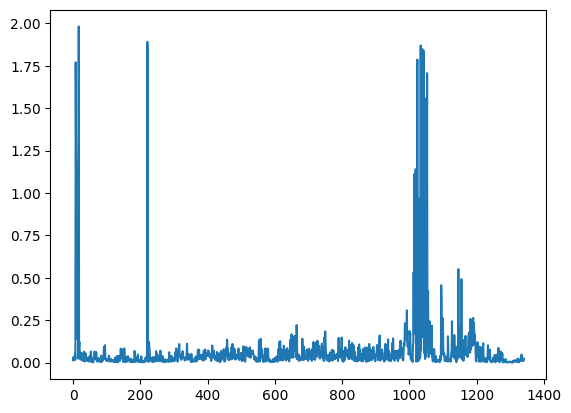

In [30]:
diffs = []

from_joint = "LEFT_SHOULDER"
to_joint = "RIGHT_SHOULDER"

for i in range(1, len(pose_data)):
    first_normed_rel_vec = find_normalized_relative_vec(from_joint, to_joint, i-1)
    second_normed_rel_vec = find_normalized_relative_vec(from_joint, to_joint, i)
    diff_norm = np.linalg.norm(np.array(second_normed_rel_vec) - np.array(first_normed_rel_vec))
    diffs.append(diff_norm)

plt.plot(diffs)
sum(diffs)


198.46508077581228

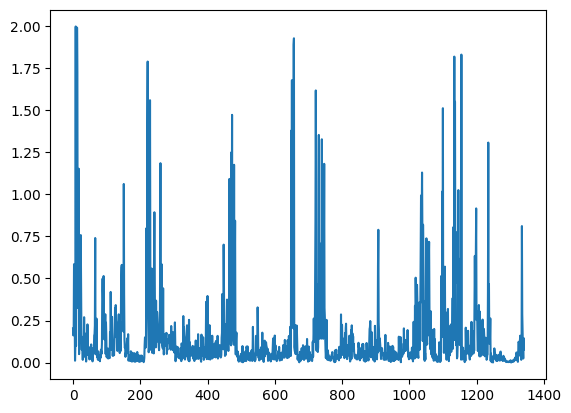

In [33]:
diffs = []

from_joint = "LEFT_WRIST"
to_joint = "LEFT_ELBOW"

for i in range(1, len(pose_data)):
    first_normed_rel_vec = find_normalized_relative_vec(from_joint, to_joint, i-1)
    second_normed_rel_vec = find_normalized_relative_vec(from_joint, to_joint, i)
    diff_norm = np.linalg.norm(np.array(second_normed_rel_vec) - np.array(first_normed_rel_vec))
    diffs.append(diff_norm)

plt.plot(diffs)
sum(diffs)